<a href="https://colab.research.google.com/github/pryplotsky/C5.-Deep-Survival-Analysis-and-Time-Varying-Covariates/blob/main/CPH001.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Cox Time model is taken from:
https://lifelines.readthedocs.io/en/latest/Time%20varying%20survival%20regression.html

In [ ]:
#Some basic istructions:
# 1. Each line of code must be FULLY DOCUMENTED
# 2. Everything should be inside a class(classes) or functions if you don't know OOP
# 3. Please avoid using values (numbers/string/....) use instead variables
# 4. Use default values for your function arguments whenever possible

#Plan:
# We need functions/methods for:
# 1. Read, save and load a data - DONE
# 2. Pre-process the data (if needed) - DONE
# 3. Split the data into 3 sets: train(80%)  + dev (10%) + test(10%) - DONE
# 4. Obtain relevant statistics (if needed) - NOT NOW
# 5. Create Cox time ( CPH for TVC) model - In Progress
# a) Calculate C index for test set
# b) Kaplan-Meier curve (total survival distribution)
# c) Excample for 5 random observations (individual survival distribution)
# d) I don't thing CoxTimeVaryingFitter is a neutonal network. I think is a classic Cox proportional hasard, because ve dont have:
# loss function, any parametrs for validation...

In [1]:
### Install  packages and define global variables
#Basic:
import pandas as pd
import numpy as np
# 1. Read, save and load a data:
import os
import pickle
# 2. Pre-process the data 
from sklearn import preprocessing
# 3. Split the data into 3 sets
import sklearn
from sklearn.model_selection import train_test_split
# 5. Create Cox time ( CPH for TVC) model
!pip install lifelines
from lifelines import CoxTimeVaryingFitter

**Main part of code**

In [2]:
### Create class Preparation with 5 methods: __init__, readdf, save, load, cleaning and splitdata
class Preparation:
  def __init__(self):# Dont use any additional attributes    
    self.df = None # Placeholders. Set varabels as none and then update a resut 
    self.X_train = None
    self.X_test = None
    self.y_train = None
    self.y_test  = None
    self.X_train = None
    self.X_val = None
    self.y_train = None
    self.y_val = None
    self.cols_standardize = ['rate_time','hpi_time', 'gdp_time']# place for variables to standartize 
### Pre-processing:
  # Read data
  def readdf (self, sep=",", filename="dcr.csv", cwd = os.getcwd()): # Method whith 3 def attributes: sep - separator, getcwd - path to your working directory
    file_name = cwd + "/" + filename # Get path of file
    data = pd.read_csv(file_name, sep= sep) # Read csv
    self.df = data # Save filtered dataset 
    return self.df # Print dataset
  # Clean data
  def cleaning (self, data,longformat=True,individual="id", stop="time", stopname="start"): 
    col1 = data.loc[:,self.cols_standardize]# separate the variables to be standartized
    col2 = data.drop(columns=self.cols_standardize)# separate the variables not to be standartized
    standard = preprocessing.scale(col1)# standardization of variables
    df2 = pd.DataFrame(standard, columns=self.cols_standardize)# to dataframe
    df3=pd.concat([col2,df2], axis=1)# merge 2 df
    data2 = df3.drop_duplicates() #drop double row entries
    self.df = data2 # Save filtered dataset
    if longformat:# Bring data into long format (necessary for using the lifeline package's Cox’s time varying proportional hazard model) 
        data2[stopname] = data2.groupby(individual)[stop].shift(1)
        data2[stopname] = data2[stopname].fillna(0)
        self.df = data2 # Save filtered dataset
        return self.df # Print dataset
### Saving and load objects as binary mode
  def save (self, dataname, dataframe , cwd = os.getcwd()):# Saving and load objects as binary mode
    with open( cwd + '/' + dataname + '.pkl','wb') as path_name: # save df, 'wb' specifies 'write'
      pickle.dump(dataframe, path_name)  
  def load (self, dataname, cwd = os.getcwd()):# Saving and load objects as binary mode
    with open( cwd + '/' + dataname + '.pkl' ,'rb') as path_name:# load df, 'rb' specifies 'read'
      dataframe = pickle.load(path_name)
      return dataframe # Print dataset
### Split the data into 3 sets: train(80%)  + dev (10%) + test(10%)  
  def splitdata (self, Xvar, yvar, perc_test=0.1, perc_val=1/9,  shuffle=False):# Method needs 5 arguments: X set with independent vars, y - set w. dependent vars, perc_test=percentage for test set, perc_val=valuation set (=(1-perc_test)*perc_val) 
    self.X_train, self.X_test, self.y_train, self.y_test = sklearn.model_selection.train_test_split(Xvar, yvar, test_size=perc_test,  shuffle=shuffle)# Split data not randomly to train 90% and test 10%
    self.X_train, self.X_val, self.y_train, self.y_val = sklearn.model_selection.train_test_split(self.X_train, self.y_train, test_size=perc_val,  shuffle=shuffle) # Split train data not randomly to train 80% and valid 10%
    print(len(self.X_train), len(self.X_val), len(self.X_test)) # len - length 

**Testing**

In [3]:
temp=Preparation()
newdf = temp.readdf()
www2=temp.cleaning(newdf)
temp.save('qwer', newdf)
temp.splitdata(www2.loc[:,www2.columns != "status_time"], yvar=www2.status_time)
temp.X_train

49712 6214 6214


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,id,time,orig_time,first_time,mat_time,res_time,balance_time,LTV_time,interest_rate_time,uer_time,REtype_CO_orig_time,REtype_PU_orig_time,REtype_SF_orig_time,investor_orig_time,balance_orig_time,FICO_orig_time,LTV_orig_time,Interest_Rate_orig_time,state_orig_time,hpi_orig_time,default_time,payoff_time,lgd_time,recovery_res,rate_time,hpi_time,gdp_time,start
0,4,25,-2,25,119,NaN,61031.10,33.911009,10.500,4.7,0,0,1,0,63750.0,587,81.8,10.5,KY,97.99,0,0,NaN,NaN,2.694535,1.527288,0.775016,0.0
1,4,26,-2,25,119,NaN,60882.42,34.007232,10.500,4.7,0,0,1,0,63750.0,587,81.8,10.5,KY,97.99,0,0,NaN,NaN,2.694535,1.484264,0.392294,25.0
2,4,27,-2,25,119,NaN,60729.80,34.335349,10.500,4.4,0,0,1,0,63750.0,587,81.8,10.5,KY,97.99,0,0,NaN,NaN,2.694535,1.386286,0.499958,26.0
3,4,28,-2,25,119,NaN,60576.14,34.672545,10.875,4.6,0,0,1,0,63750.0,587,81.8,10.5,KY,97.99,0,0,NaN,NaN,2.694535,1.287946,-0.079699,27.0
4,4,29,-2,25,119,NaN,60424.39,34.951639,10.875,4.5,0,0,1,0,63750.0,587,81.8,10.5,KY,97.99,0,0,NaN,NaN,2.694535,1.204791,0.157680,28.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49745,38915,33,19,21,139,NaN,345078.63,78.260975,5.500,5.0,0,0,1,0,367500.0,788,78.6,5.5,FL,191.42,0,0,NaN,NaN,-0.538972,-0.127495,-0.280491,32.0
49746,38915,34,19,21,139,NaN,342503.68,80.889828,5.500,5.8,0,0,1,0,367500.0,788,78.6,5.5,FL,191.42,0,0,NaN,NaN,-0.538972,-0.386721,-0.869748,33.0
49747,38915,35,19,21,139,NaN,340946.07,86.115630,5.500,6.5,0,0,1,0,367500.0,788,78.6,5.5,FL,191.42,0,0,NaN,NaN,-0.538972,-0.793819,-2.144884,34.0
49748,38915,36,19,21,139,NaN,338314.04,91.436004,5.500,7.8,0,0,1,0,367500.0,788,78.6,5.5,FL,191.42,0,0,NaN,NaN,-0.538972,-1.177416,-2.508644,35.0


**Cox Time**

In [ ]:
base_df=temp.df.loc[:, ["id", "time", "start","rate_time", "hpi_time", "gdp_time", "status_time" ]]# define df with variables for Cox time

In [ ]:
base_df.status_time.describe() # Event ( status time has values 0,1,2)

count    62140.000000
mean         0.109028
std          0.426181
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          2.000000
Name: status_time, dtype: float64

Iteration 5: norm_delta = 0.00000, step_size = 1.00000, ll = -32660.62002, newton_decrement = 0.00000, seconds_since_start = 0.6Convergence completed after 5 iterations.


<lifelines.CoxTimeVaryingFitter: fitted with 62140 periods, 5000 subjects, 4150 events>
         event col = 'status_time'
         penalizer = 0.1
number of subjects = 5000
 number of periods = 62140
  number of events = 4150
partial log-likelihood = -32660.62
  time fit was run = 2021-06-16 12:45:55 UTC

---
            coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                         
rate_time  -0.01       0.99       0.01            -0.02             0.01                 0.98                 1.01
hpi_time   -0.03       0.97       0.01            -0.06            -0.01                 0.95                 0.99
gdp_time    0.05       1.05       0.01             0.02             0.07                 1.02                 1.07

              z      p   -log2(p)
covariate                        
rate_time -0.61   0.54       0.89
hpi_time  -2.72   0.01       7.24
gdp_time   3.97 <0.005      13.79
---
Partial AIC = 65327.24
log-likelihood ratio test = 23.08 on 3 df
-log2(p) of ll-ratio test = 14.65

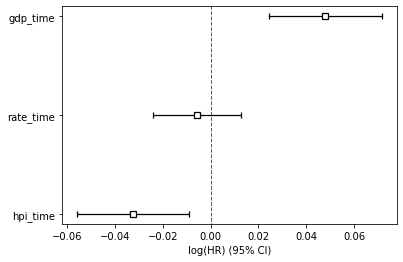

In [ ]:
# Cox model, code from internet https://lifelines.readthedocs.io/en/latest/Time%20varying%20survival%20regression.html
ctv = CoxTimeVaryingFitter(penalizer=0.1)
ctv.fit(base_df, id_col="id", event_col="status_time", start_col="start", stop_col="time", show_progress=True )
ctv.print_summary()
ctv.plot()

In [ ]:
base_df['hazard'] = ctv2.predict_log_partial_hazard(train)